# Ridge Regularization

## Introduction

**Ridge regularization** (also known as L2 regularization) is a technique used to prevent overfitting in machine learning models by adding a penalty to the loss function. This penalty term is proportional to the square of the magnitude of the coefficients. Ridge regularization helps to keep the model coefficients small, which can lead to a simpler and more generalizable model.

## Explanation

Ridge regularization modifies the linear regression cost function by adding a penalty term that is the sum of the squared coefficients. This penalty discourages the model from having large coefficients, thus preventing overfitting.

### Key Points:
- **L2 Penalty**: The penalty term is proportional to the sum of the squares of the coefficients.
- **Shrinkage**: Ridge regression shrinks the coefficients towards zero but does not set them exactly to zero.
- **Bias-Variance Trade-Off**: Ridge regression can help reduce variance at the cost of introducing a small amount of bias.

## Mathematical Formulation

In ridge regression, the cost function is modified to include a regularization term:

$$
J(\theta) = \sum_{i=1}^{m} (y_i - \theta^T x_i)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

where:
- \( \theta \) are the model parameters (coefficients)
- \( \lambda \) is the regularization parameter
- \( m \) is the number of training examples
- \( n \) is the number of features

The regularization parameter \( \lambda \) controls the strength of the penalty. A larger \( \lambda \) means more regularization (more shrinkage), while a smaller \( \lambda \) means less regularization.

## Benefits of Ridge Regularization

1. **Prevents Overfitting**: By penalizing large coefficients, ridge regression helps prevent overfitting, which occurs when a model captures noise in the training data as if it were a true pattern.
2. **Reduces Multicollinearity**: Ridge regression is particularly useful when dealing with multicollinearity (high correlation between features) as it reduces the impact of correlated features by shrinking their coefficients.
3. **Improves Generalization**: By adding a penalty for large coefficients, ridge regression encourages simpler models that generalize better to unseen data.

## Practical Considerations

- **Choosing \( \lambda \)**: The regularization parameter \( \lambda \) is typically chosen via cross-validation. A balance must be struck, as too large a \( \lambda \) will oversimplify the model (high bias), and too small a \( \lambda \) will have little effect on preventing overfitting (high variance).
- **Standardization**: It is often recommended to standardize the features before applying ridge regression, as the regularization term penalizes the coefficients uniformly.

## Conclusion

Ridge regularization is a powerful technique to prevent overfitting in machine learning models by adding a penalty for large coefficients. It helps in achieving a balance between bias and variance, leading to models that generalize better to new data. Ridge regression is particularly useful when dealing with multicollinearity in the data, as it can reduce the impact of correlated features.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [11]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [12]:
X=data.data
y=data.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [14]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [15]:
L.fit(X_train,y_train)

LinearRegression()

In [16]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [17]:
y_pred=L.predict(X_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [19]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [20]:

R.fit(X_train,y_train)

Ridge(alpha=100000)

In [21]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [22]:
y_pred1=R.predict(X_test)

In [23]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


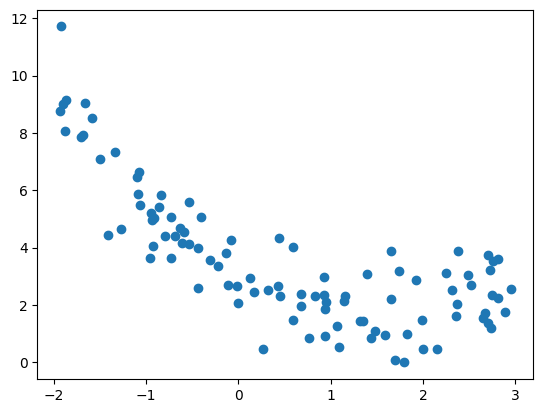

In [24]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

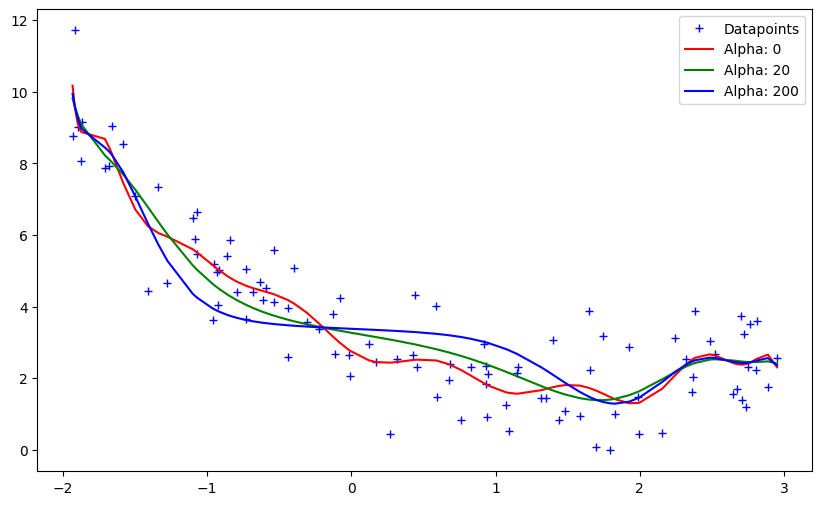

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()